# BioMed@DataScience
## Домашнее задание 1

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_bmds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b>:
* Задача 1 – 15 баллов
* Задача 2 – 30 баллов
* Задача 3 – 30 баллов

<b><font color="orange">Сложная часть</font></b>:
* Задача 4 – 25 баллов
* Задача 5 – 20 баллов


-----

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Легкая часть

### Задача 1  
Создайте матрицу 10x10 по правилу:  
- если сумма индексов элемента четна &mdash; присваиваем элементу значение 0;
- если сумма индексов элемента нечетна &mdash; присваиваем элементу значение 1.

Используйте numpy. Визуализируйте полученную матрицу с помощью `plt.imshow()`.

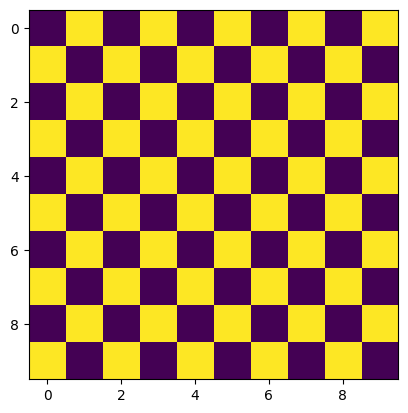

In [70]:
import numpy as np
import matplotlib.pyplot as plt

matrix = np.zeros((10, 10))

for x in range(10):
    for y in range(10):
        if (x + y) % 2 == 1:
            matrix[x][y] = 1

plt.imshow(matrix)

### Задача 2
Изобразите график параметрически заданной функции. Переменные необходимо задавать с помощью Numpy.

$$ x=\alpha\times\left(\cos t+\frac{\cos(\beta t)}{\beta}\right)$$

$$ y=\alpha\times\left(\sin t−\frac{\sin(\beta t)}{\beta}\right)$$

$t∈[0;20π]$

**1.** Реализуйте функции $x(t, \alpha, \beta)$ и $y(t, \alpha, \beta)$.

In [71]:
def x(alpha, beta, t=np.linspace(0, 20*np.pi, 1000)):
    return alpha * (np.cos(t) + (np.cos(beta*t)/beta)) 

def y(alpha, beta, t=np.linspace(0, 20*np.pi, 1000)):
    return alpha * (np.sin(t) - (np.sin(beta*t)/beta))

**2.** Постройте график в осях $x$ и $y$ при $\alpha=4$ и $\beta=1.1$. Подпишите оси.

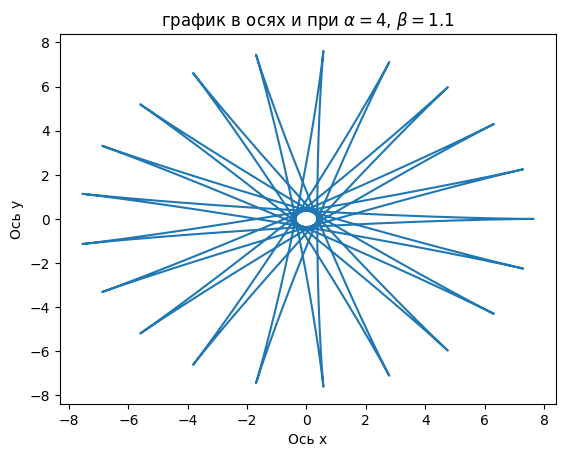

In [72]:
ox = x(4, 1.1)
oy = y(4, 1.1)

plt.plot(ox, oy)
plt.xlabel('Ось x')
plt.ylabel('Ось y')
plt.title(r'график в осях и при $\alpha = 4$, $\beta = 1.1$')
plt.show()

**3.** Постройте графики для различных значений $\alpha$ и $\beta$.  
- $\alpha$ : [2, 4, 6, 8, 10]  
- $\beta$ : [1.2, 1.8, 2, 5, 10]  

У вас должна получиться сетка 5х5 графиков. На каждом графике укажите параметры $\alpha$ и $\beta$.

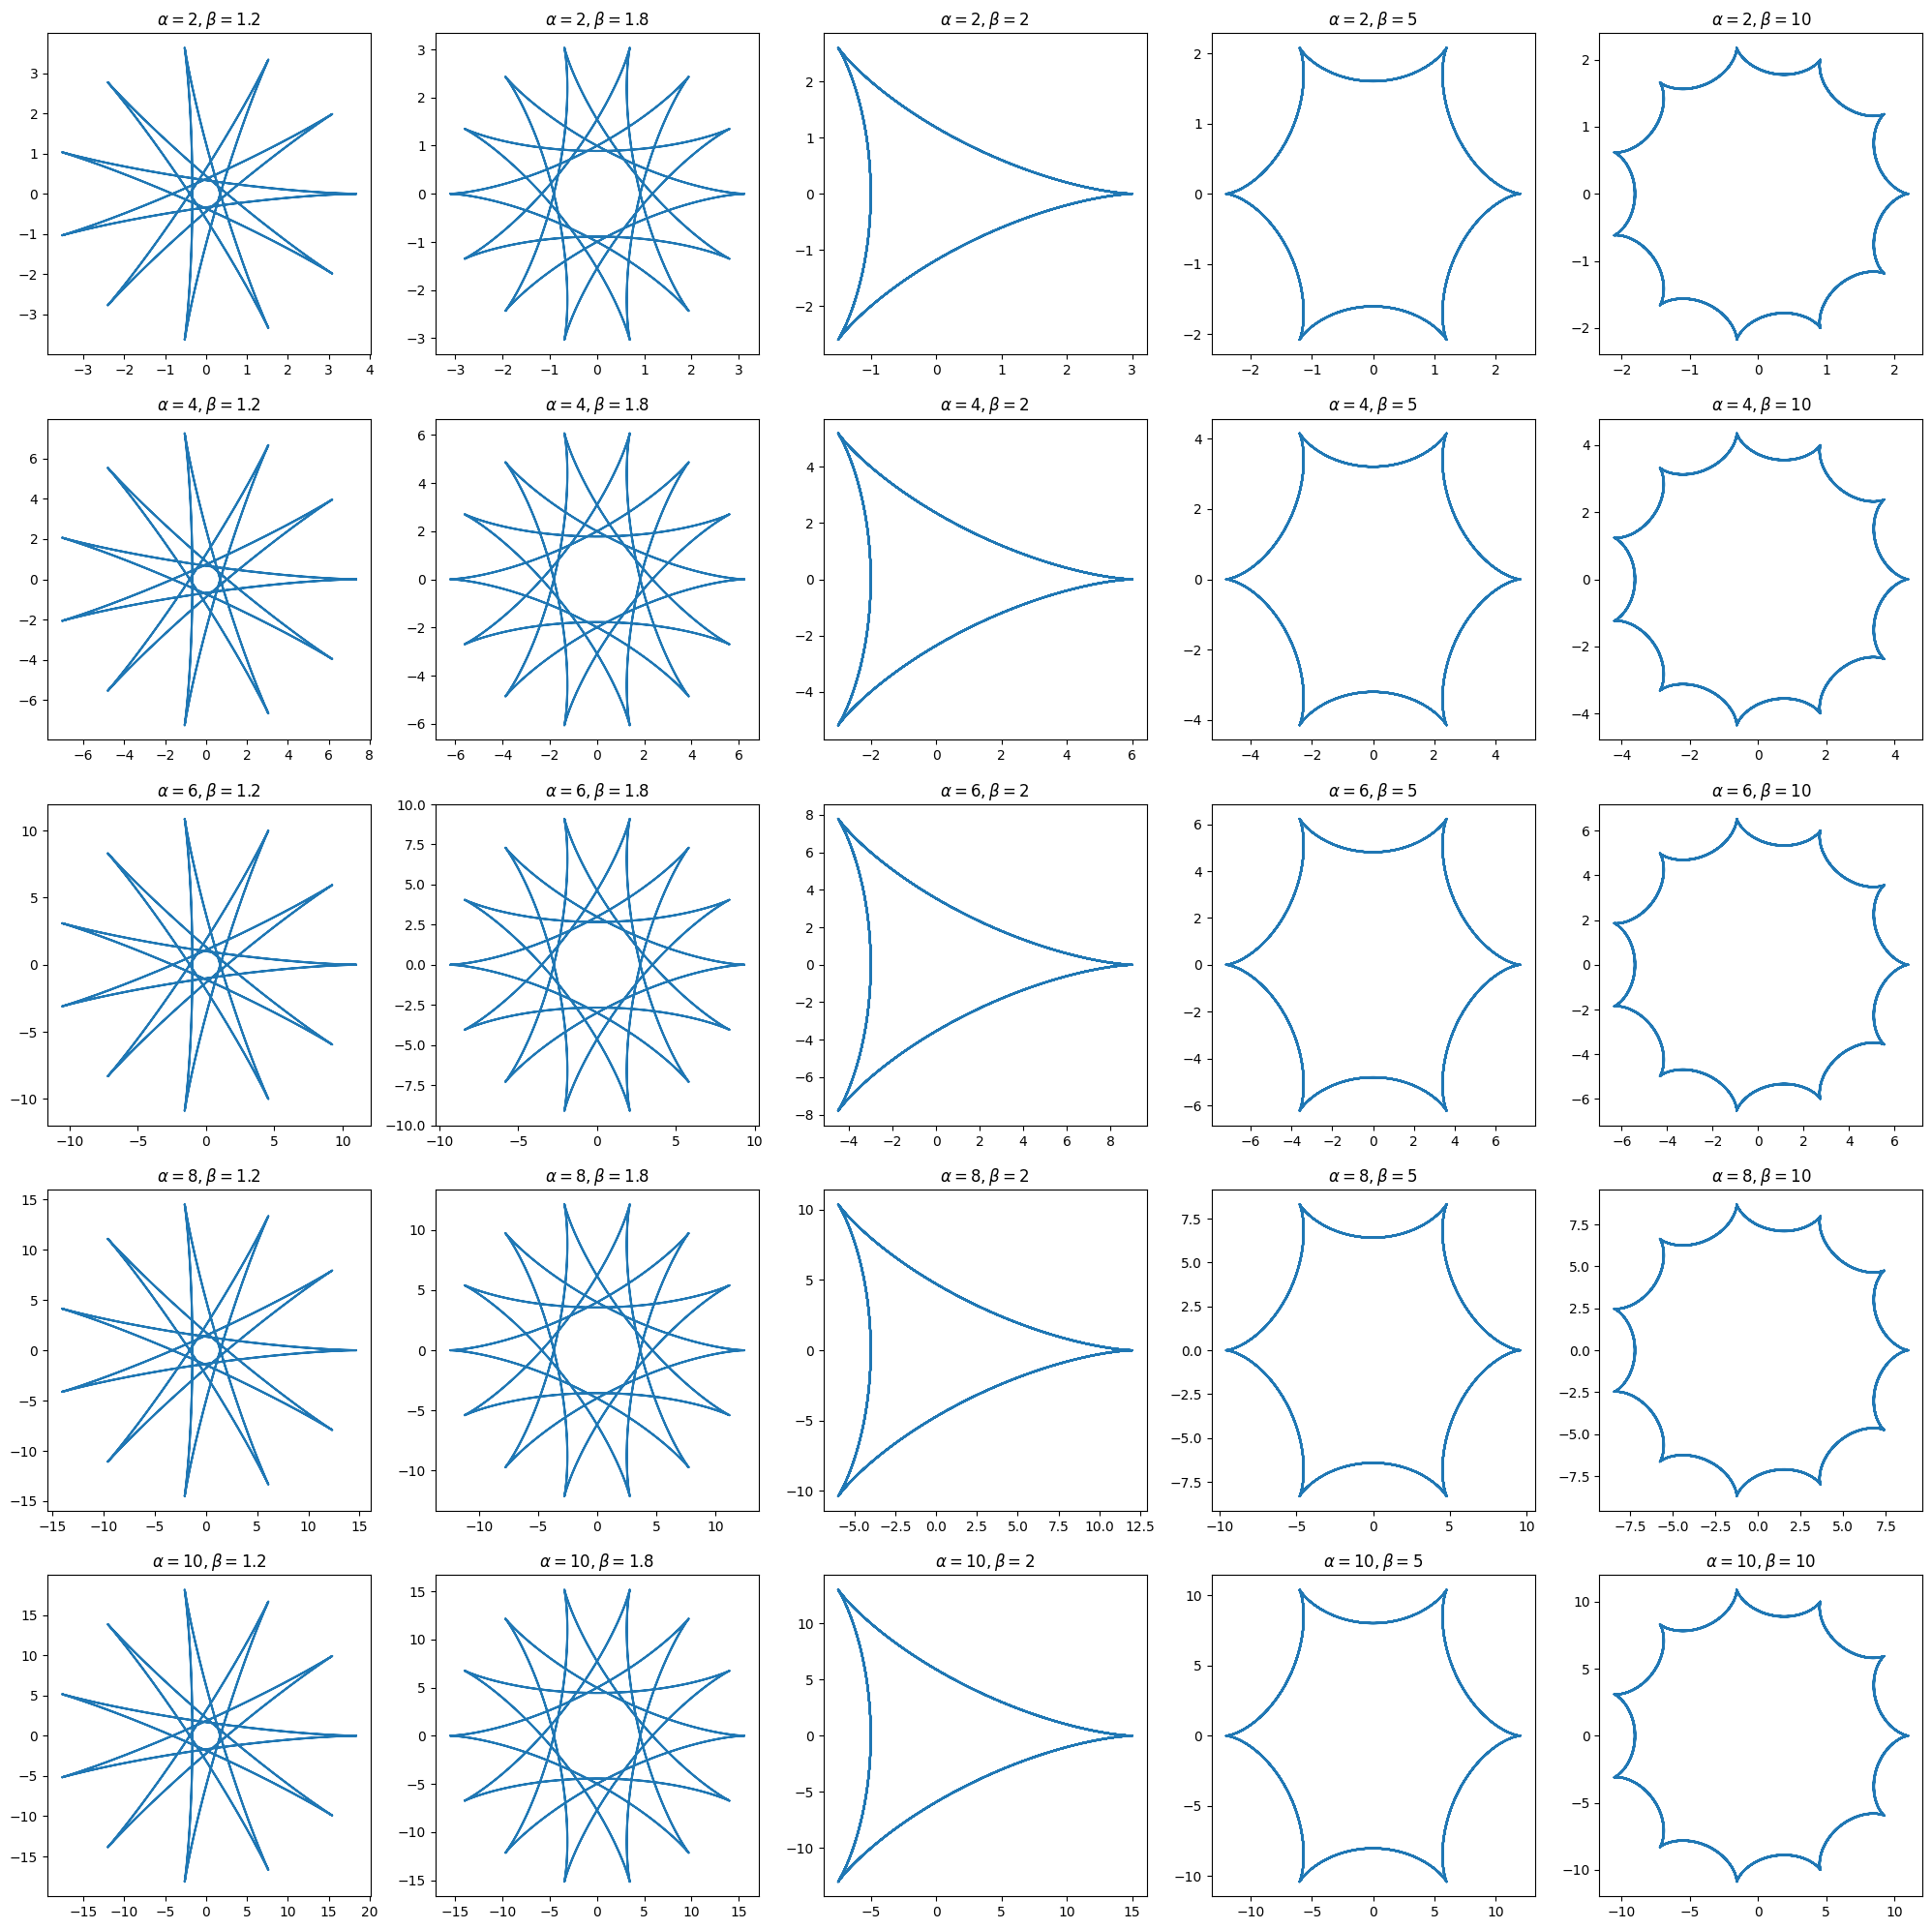

In [77]:
fig, axes = plt.subplots(5, 5, figsize=(25, 25))

alpha_arr = [2, 4, 6, 8, 10]
beta_arr = [1.2, 1.8, 2, 5, 10]

for i in range(5):
    for j in range(5):
        ox = x(alpha_arr[i], beta_arr[j])
        oy = y(alpha_arr[i], beta_arr[j])
        axes[i, j].plot(ox, oy)
        axes[i, j].set_title(rf'$\alpha = {alpha_arr[i]}, \beta = {beta_arr[j]}$'.format(alpha_arr[i], beta_arr[j]))

plt.show()

### Задача 3
- Создайте матрицу $N \times N$, каждый элемент которой равен сумме индексов этого элемента, где $N$ &mdash; число из $[10, 100, 1000, 10000]$. Используйте циклы. Визуализируйте с помощью `plt.imshow()`. Для каждого $N$ замерьте время работы вашего кода (это можно сделать с помощью библиотеки `time`).


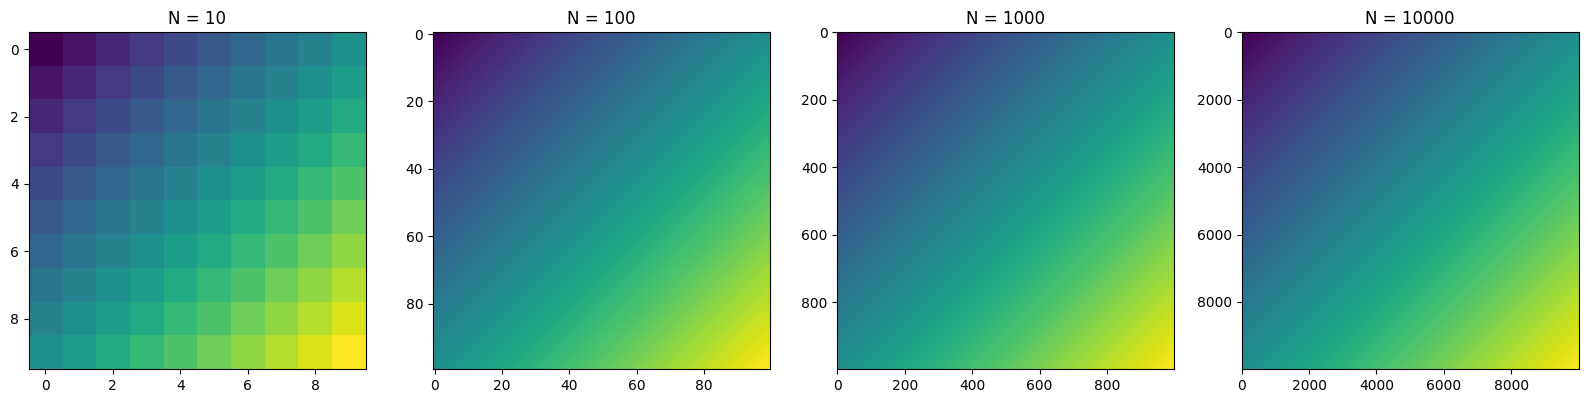

In [78]:
import time

N_arr = [10, 100, 1000, 10000]

def create_n_matrix(N):
    matrix = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            matrix[i][j] = i + j
    return matrix

def time_recorder(func, *args, **kwargs):
    start_time = time.time()
    result = func(*args, **kwargs)
    end_time = time.time()
    full_time = end_time - start_time
    return result, full_time

times = []
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i in range(4):
    matrix, full_time = time_recorder(create_n_matrix, N_arr[i])
    axes[i].imshow(matrix)
    axes[i].set_title(f"N = {N_arr[i]}")
    times.append(full_time)


- Сделайте вывод о временной сложности вашего алгоритма. Постройте график зависимости времени от $N$.


Text(0, 0.5, 'y')

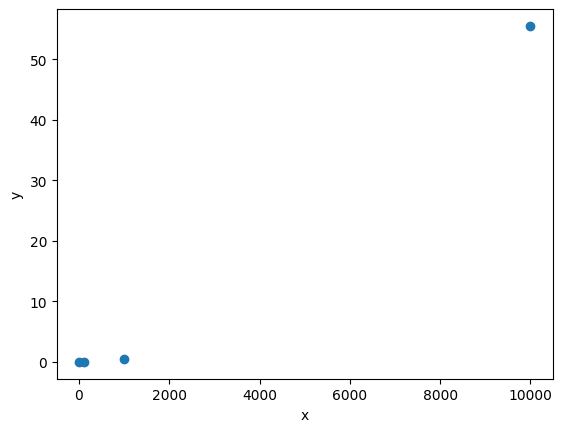

In [79]:
plt.scatter(N_arr, times)
plt.xlabel('x')
plt.ylabel('y')

- Повторите прогон вашего с алгоритма для $N = 1000000$. Что вы наблюдаете?

In [80]:
matrix = create_n_matrix(1000000)
plt.imshow(matrix)

MemoryError: Unable to allocate 7.28 TiB for an array with shape (1000000, 1000000) and data type float64

Данный код практически не выполняется для N = 1000000, т.к. с ростом N растёт время выполнения кода, но растёт нелинейно и быстро. 


# Сложная часть

### Задача 4
Повторите свое решение задачи 3 <font color='red'> без использования циклов (list comprehension тоже считается циклом).

Замерьте время исполнения программы и сравните с кодом, включающим циклы. Сделайте вывод.

In [ ]:
def create_matrix_2(N):
    start_time = time.time()
    i = np.arange(N).reshape(-1, 1)
    j = np.arange(N)
    matrix = i + j
    full_time = time.time() - start_time
    return matrix, full_time

times_2 = []
for N in N_arr:
    _, time_vec = create_matrix_2(N)
    times_2.append(time_vec)
    print(f"N = {N}: циклы = {times[N_arr.index(N)]:.6f} сек, без циклов = {time_vec:.6f} сек")

Без циклов данная задача работает в разы быстрее, что в том числе позволяет создавать матрицы при больших N.

### Задача 5

В данной задаче вам необходимо найти минимальную и максимальную цену страховки людей в разной возрастной категории.

Откройте датасет и посмотрите на первые 5 строк.

In [ ]:
df = pd.read_csv('insurance.csv')

Разделите людей на несколько возрастных категорий. Для этого

> создайте новый столбец, назовите его **"age_group"**;

> для каждой возрастной категории присвойте номер:

- 1: 18 ≤ возраст < 25

- 2: 25 ≤ возраст < 35

- 3: 35 ≤ возраст < 45

- 4: 45 ≤ возраст < 55

- 5: возраст ≥ 55

Воспользуйтесь функцией `pd.cut()`

In [ ]:
age = [18, 25, 35, 45, 55, float('inf')]
numbers = [1, 2, 3, 4, 5]

df['age_group'] = pd.cut(df['age'], bins=age, labels=numbers, right=False)

Теперь в каждой возрастной группе необходимо получить минимальное и максимальное значение `charges`.

Для этого воспользуйте агрегацией `.groupby()`

In [ ]:
result = df.groupby('age_group', observed=False)['charges'].agg(['min', 'max'])

Создайте и выведите DataFrame, где в качестве индексов будет возрастная группа, а в качестве названия столбцов 'min' и 'max'.

In [81]:
result.columns = ['min', 'max']

print(result)

                  min          max
age_group                         
1           1121.8739  44501.39820
2           2137.6536  58571.07448
3           4399.7310  48885.13561
4           7147.1050  63770.42801
5          10214.6360  52590.82939


**Полезные ссылки**

Наши учебные материалы по основным библиотекам Python:
- <a href="https://thetahat.ru/courses/python" target="_blank">Python для анализа данных</a>

Если ты считаешь, что тебе нужно больше практики, рекомендуем эти ресурсы:
- [Тренажер по numpy](https://github.com/rougier/numpy-100?utm_referrer=https://dzen.ru/media/id/5e048b1b2b616900b081f1d9/65805c3b83225d541b5a26be)
- [Практика по numpy](https://stepik.org/course/189476/info)
- [Тренажер по pandas](https://www.machinelearningplus.com/python/101-pandas-exercises-python/?utm_referrer=https://dzen.ru/media/id/5e048b1b2b616900b081f1d9/65805c3b83225d541b5a26be)
- [Cборник курсов от Kaggle](https://www.kaggle.com/learn)

Если совсем тяжело с питоном, посмотри эти страницы:
- [Базовые навыки владения Python](https://ru.pythontutor.ru/problem/old/1)
- [Адаптивный тренажер](https://stepik.org/course/431/info)